<a href="https://colab.research.google.com/github/kundana12345/PainAI/blob/main/Pain_Recognition_with_Experimental_Dataset_Explainability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References used:


*   https://www.nature.com/articles/s41597-024-03878-w
*   https://github.com/gouverneurp/PMD
*   https://github.com/gouverneurp/XAIinPainResearch


*   https://arxiv.org/abs/2303.10607






#Data

Data Source: https://figshare.com/articles/dataset/The_PainMonit_Database_An_Experimental_and_Clinical_Physiological_Signal_Dataset_for_Automated_Pain_Recognition/26965159

I am using the Experimental Dataset (PMED), not the Clinical Dataset.

Physiological signals

* BVP (blood volume pulse) from Empatica E4

* EDA (electrodermal activity) from E4

* EDA from the research-grade biosignal device (RB)

* ECG

* EMG

* Respiration

* IBI (inter-beat interval)

* HR (heart rate)

* Skin temperature

Pain-related signals

* Thermode (heater) temperature

* CoVAS (continuous subjective pain rating)

Ground truth labels (based on temperature)

*   Baseline (no stimulus) = 0
*   Non painful stimulus = 1
*   Pain levels (P1-P4) = 2, 3, 4, 5




CoVAS:
This dataset also includes subjective pain ratings for each subject from C0 (no pain)-C4. They are subject specific and then normalized based on a subject's maximum CoVAS value.

#Pre-processing

Converting files to numpy using existing script.

In [1]:
!git clone https://github.com/gouverneurp/PMD
%cd PMD


Cloning into 'PMD'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 37 (delta 12), reused 22 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (37/37), 20.12 KiB | 10.06 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/PMD


In [2]:
# Install typical dependencies for this type of project
!pip install numpy>=1.21.0 pandas>=1.3.0 scipy>=1.7.0 scikit-learn>=0.24.0 matplotlib>=3.4.0

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!mkdir -p /content/PMD/PMED/dataset

In [5]:
!ls /content/PMD/PMED

config.py  create_np_files.py  dataset	heater.py  read_data.py


In [6]:
!cp -r /content/drive/MyDrive/2025-2026/Pain_AI/PMED/dataset/raw-data/* /content/PMD/PMED/dataset/

In [7]:
!ls dataset


ls: cannot access 'dataset': No such file or directory


In [8]:
import glob

files = glob.glob("dataset/*.csv")
print("Found files:", len(files))
print(files[:5])


Found files: 0
[]


In [9]:
%cd /content/PMD/PMED
!ls


/content/PMD/PMED
config.py  create_np_files.py  dataset	heater.py  read_data.py


In [10]:
!python create_np_files.py


Create PMED np files...
0it [00:00, ?it/s]
Traceback (most recent call last):
  File "/content/PMD/PMED/create_np_files.py", line 222, in <module>
    create_np_pmhdb(overwrite= args.overwrite)
  File "/content/PMD/PMED/create_np_files.py", line 174, in create_np_pmhdb
    data = np.concatenate(data_list, axis=0)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: need at least one array to concatenate


In [11]:
!mv dataset/*.csv dataset/raw-data/

In [12]:
!python create_np_files.py

Create PMED np files...
100% 52/52 [01:22<00:00,  1.59s/it]

Data shape:  (2495, 2500, 6, 1)
heater shape:  (2495, 6)
covas shape:  (2495, 5)
Subjects shape:  (2495,)
Np dataset created and saved under '/content/PMD/PMED/dataset/np-dataset'.


In [13]:
# Navigate to the numpy dataset directory
%cd /content/PMD/PMED/dataset/np-dataset/

# List the files
!ls -lh

/content/PMD/PMED/dataset/np-dataset
total 286M
-rw-r--r-- 1 root root  20K Jan 28 00:33 subjects.npy
-rw-r--r-- 1 root root 286M Jan 28 00:33 X.npy
-rw-r--r-- 1 root root  49K Jan 28 00:33 y_covas.npy
-rw-r--r-- 1 root root  59K Jan 28 00:33 y_heater.npy


In [14]:
import numpy as np

# Load the numpy files with correct names
X = np.load('X.npy')
subjects = np.load('subjects.npy')
y_covas = np.load('y_covas.npy')  # COVAS pain ratings
y_heater = np.load('y_heater.npy')  # Heater temperature levels

# Display the shapes and basic info
print("="*50)
print("DATASET INFORMATION")
print("="*50)
print(f"X (features) shape: {X.shape}")
print(f"  - Samples: {X.shape[0]}")
print(f"  - Time steps: {X.shape[1]}")
print(f"  - Features/Channels: {X.shape[2]}")

print(f"\ny_covas (COVAS pain labels) shape: {y_covas.shape}")
print(f"  - Unique COVAS values: {np.unique(y_covas)}")
print(f"  - COVAS min: {y_covas.min()}, max: {y_covas.max()}")

print(f"\ny_heater (heater temperature) shape: {y_heater.shape}")
print(f"  - Unique heater levels: {np.unique(y_heater)}")
print(f"  - Heater min: {y_heater.min()}, max: {y_heater.max()}")

print(f"\nsubjects shape: {subjects.shape}")
print(f"  - Number of unique subjects: {len(np.unique(subjects))}")
print(f"  - Subject IDs: {sorted(np.unique(subjects))}")

DATASET INFORMATION
X (features) shape: (2495, 2500, 6, 1)
  - Samples: 2495
  - Time steps: 2500
  - Features/Channels: 6

y_covas (COVAS pain labels) shape: (2495, 5)
  - Unique COVAS values: [0. 1.]
  - COVAS min: 0.0, max: 1.0

y_heater (heater temperature) shape: (2495, 6)
  - Unique heater levels: [0. 1.]
  - Heater min: 0.0, max: 1.0

subjects shape: (2495,)
  - Number of unique subjects: 52
  - Subject IDs: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np

In [15]:
import numpy as np

# Convert one-hot encoded y_heater to single integer labels (0-5)
# Each row represents a sample, and the column index of '1' indicates the level.
heater_levels_flat = np.argmax(y_heater, axis=1)

unique_levels, counts = np.unique(heater_levels_flat, return_counts=True)
heater_distribution = dict(zip(unique_levels, counts))

print("Number of data points in each heater level:")
for level, count in sorted(heater_distribution.items()):
    print(f"Level {level}: {count} samples")

Number of data points in each heater level:
Level 0: 416 samples
Level 1: 416 samples
Level 2: 416 samples
Level 3: 415 samples
Level 4: 416 samples
Level 5: 416 samples


# All signals

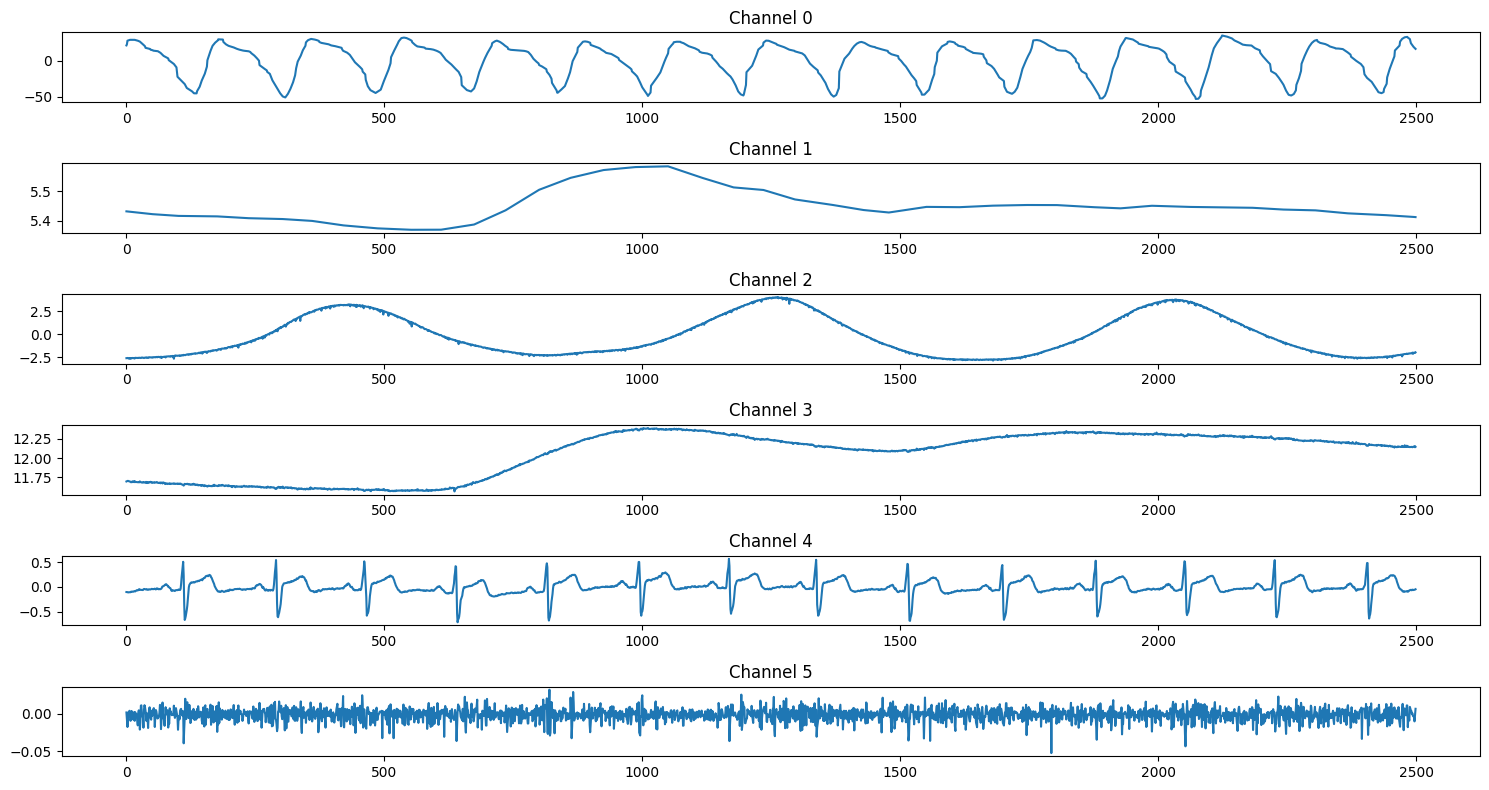

In [ ]:
import matplotlib.pyplot as plt

sample_id = 0

plt.figure(figsize=(15, 8))

for ch in range(X.shape[2]):
    plt.subplot(X.shape[2], 1, ch+1)
    plt.plot(X[sample_id, :, ch, 0])
    plt.title(f"Channel {ch}")
    plt.tight_layout()

plt.show()


In [ ]:
CHANNEL_MAP = {
    0: "Resp",
    1: "EDA",
    2: "SkinTemp",
    3: "BVP",
    4: "ECG",
    5: "EMG"
}


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import find_peaks, welch
from scipy.stats import skew, kurtosis

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import shap


In [ ]:
FS = 100


In [ ]:
def basic_features(x):
    return {
        "mean": np.mean(x),
        "std": np.std(x),
        "min": np.min(x),
        "max": np.max(x),
        "range": np.ptp(x),
        "rms": np.sqrt(np.mean(x**2)),
        "iqr": np.percentile(x, 75) - np.percentile(x, 25),
        "skew": skew(x),
        "kurtosis": kurtosis(x),
        "energy": np.sum(x**2),
        "diff1": np.mean(np.abs(np.diff(x))),
        "diff2": np.mean(np.abs(np.diff(x, 2)))
    }


In [ ]:
def eda_features(x):
    peaks, props = find_peaks(x, height=np.std(x))
    return {
        "scr_count": len(peaks),
        "scr_mean_amp": np.mean(props["peak_heights"]) if len(peaks) > 0 else 0,
        "scr_max_amp": np.max(props["peak_heights"]) if len(peaks) > 0 else 0,
        "tonic_mean": np.mean(x),
        "phasic_std": np.std(x - np.mean(x))
    }


In [ ]:
def hr_features(x):
    peaks, _ = find_peaks(x, distance=int(0.4 * FS))

    if len(peaks) < 2:
        return {
            "hr_mean": 0,
            "hr_std": 0,
            "rr_mean": 0,
            "rr_std": 0,
            "rmssd": 0,
            "peak_count": len(peaks)
        }

    rr = np.diff(peaks) / FS
    hr = 60 / rr

    return {
        "hr_mean": np.mean(hr),
        "hr_std": np.std(hr),
        "rr_mean": np.mean(rr),
        "rr_std": np.std(rr),
        "rmssd": np.sqrt(np.mean(np.diff(rr)**2)),
        "peak_count": len(peaks)
    }


In [ ]:
def emg_features(x):
    freqs, psd = welch(x, FS)
    mnf = np.sum(freqs * psd) / np.sum(psd)
    mdf = freqs[np.where(np.cumsum(psd) >= np.sum(psd)/2)[0][0]]
    zc = np.sum(np.diff(np.sign(x)) != 0)

    return {
        "mav": np.mean(np.abs(x)),
        "rms": np.sqrt(np.mean(x**2)),
        "zero_crossings": zc,
        "mnf": mnf,
        "mdf": mdf
    }


In [ ]:
def resp_features(x):
    peaks, _ = find_peaks(x, distance=FS)
    duration = len(x) / FS
    breathing_rate = len(peaks) * (60 / duration)

    return {
        "breathing_rate": breathing_rate,
        "resp_std": np.std(x)
    }


In [ ]:
def extract_features(X):
    rows = []

    for i in range(X.shape[0]):
        sample_feats = {}

        for ch in range(X.shape[2]):
            sig = X[i, :, ch, 0]
            name = CHANNEL_MAP[ch]

            # basic
            for k, v in basic_features(sig).items():
                sample_feats[f"{name}_{k}"] = v

            # signal-specific
            if name == "EDA":
                for k, v in eda_features(sig).items():
                    sample_feats[f"{name}_{k}"] = v

            if name in ["ECG", "BVP"]:
                for k, v in hr_features(sig).items():
                    sample_feats[f"{name}_{k}"] = v

            if name == "EMG":
                for k, v in emg_features(sig).items():
                    sample_feats[f"{name}_{k}"] = v

            if name == "Resp":
                for k, v in resp_features(sig).items():
                    sample_feats[f"{name}_{k}"] = v

        rows.append(sample_feats)

    return pd.DataFrame(rows)


In [ ]:
X_feat = extract_features(X)
print("Feature matrix:", X_feat.shape)


Feature matrix: (2495, 95)


In [ ]:
#y_heater is one-hot encoded: shape (2495, 6)
y = np.argmax(y_heater, axis=1)

print("Unique heat levels:", np.unique(y))


Unique heat levels: [0 1 2 3 4 5]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_feat,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [ ]:
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=15,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=400,
                       n_jobs=-1, random_state=42)

              precision    recall  f1-score   support

           0       0.41      0.57      0.47        83
           1       0.25      0.28      0.26        83
           2       0.12      0.08      0.10        83
           3       0.13      0.11      0.12        83
           4       0.20      0.14      0.17        84
           5       0.50      0.63      0.56        83

    accuracy                           0.30       499
   macro avg       0.27      0.30      0.28       499
weighted avg       0.27      0.30      0.28       499



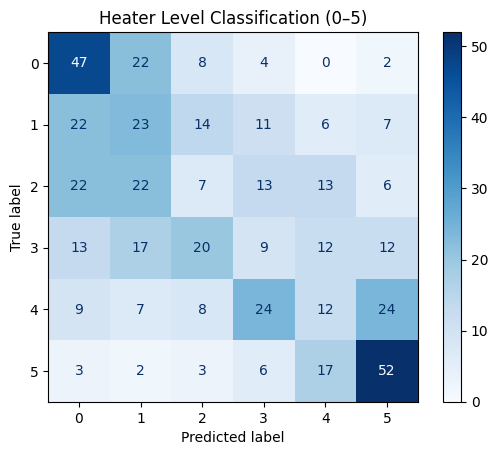

In [ ]:
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5])
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[0,1,2,3,4,5]
)
disp.plot(cmap="Blues")
plt.title("Heater Level Classification (0–5)")
plt.show()


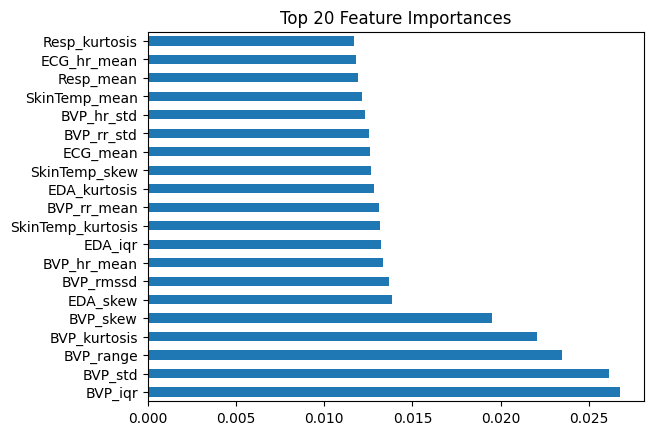

In [ ]:
importances = pd.Series(
    rf.feature_importances_,
    index=X_feat.columns
).sort_values(ascending=False)

importances.head(20).plot(kind="barh")
plt.title("Top 20 Feature Importances")
plt.show()


# UPDATED JAN 17


### SHAP Summary Plots for Each Pain Level (Class)

SHAP values are not in multi-output format (list of arrays).
Displaying a single aggregated SHAP summary plot.


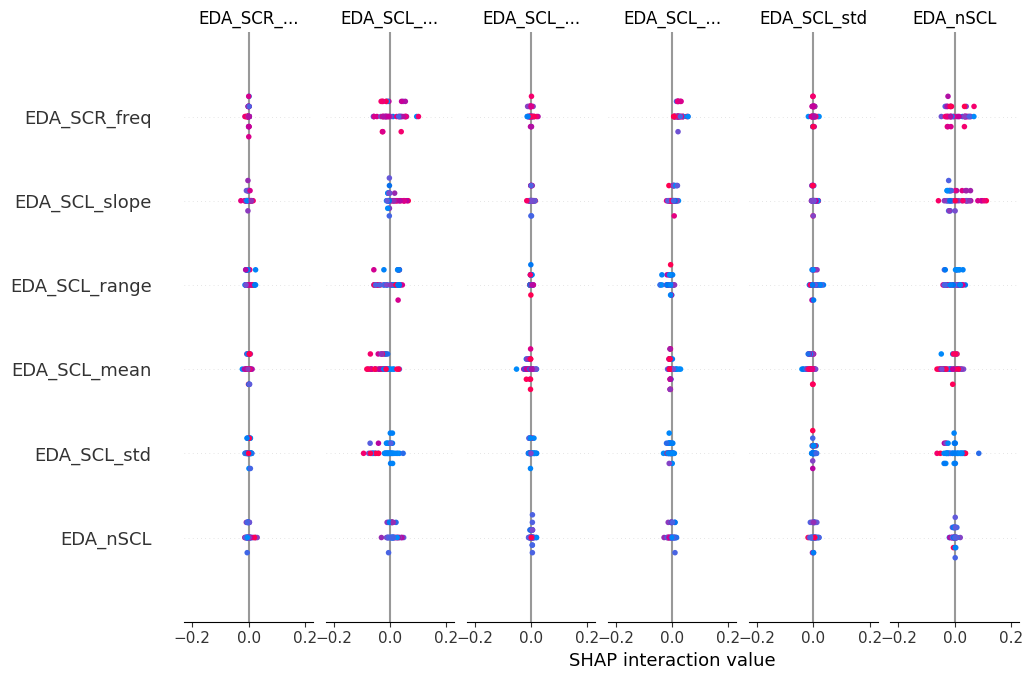

In [38]:
if isinstance(shap_values, list):
    # Assumes shap_values is a list of arrays for multi-output models
    class_names = [f'Pain Level {c}' for c in np.unique(y)] # Assuming y has unique values 0-5

    for i, shap_vals_class in enumerate(shap_values):
        if i < len(class_names):
            print(f"\nSummary Plot for {class_names[i]}")
            shap.summary_plot(
                shap_vals_class,
                X_test,
                feature_names=X_feat.columns,
                show=False # Prevent immediate display to allow adding title
            )
            plt.title(f'Feature Importance for {class_names[i]}')
            plt.show()
else:
    print("SHAP values are not in multi-output format (list of arrays).")
    print("Displaying a single aggregated SHAP summary plot.")
    shap.summary_plot(shap_values, X_test, feature_names=X_feat.columns)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Imports for feature extraction
from scipy.signal import find_peaks, welch
from scipy.stats import skew, kurtosis

# Define CHANNEL_MAP and FS
CHANNEL_MAP = {
    0: "Resp",
    1: "EDA",
    2: "SkinTemp",
    3: "BVP",
    4: "ECG",
    5: "EMG"
}
FS = 100

In [ ]:
# Helper functions for feature extraction
def basic_features(x):
    return {
        "mean": np.mean(x),
        "std": np.std(x),
        "min": np.min(x),
        "max": np.max(x),
        "range": np.ptp(x),
        "rms": np.sqrt(np.mean(x**2)),
        "iqr": np.percentile(x, 75) - np.percentile(x, 25),
        "skew": skew(x),
        "kurtosis": kurtosis(x),
        "energy": np.sum(x**2),
        "diff1": np.mean(np.abs(np.diff(x))),
        "diff2": np.mean(np.abs(np.diff(x, 2)))
    }

def eda_features(x):
    # Ensure x is float to avoid precision issues in find_peaks height calculation
    x = x.astype(float)
    peaks, props = find_peaks(x, height=np.std(x)) # Use height for basic filtering
    return {
        "scr_count": len(peaks),
        "scr_mean_amp": np.mean(props["peak_heights"]) if len(peaks) > 0 else 0,
        "scr_max_amp": np.max(props["peak_heights"]) if len(peaks) > 0 else 0,
        "tonic_mean": np.mean(x),
        "phasic_std": np.std(x - np.mean(x))
    }

def hr_features(x):
    peaks, _ = find_peaks(x, distance=int(0.4 * FS))

    if len(peaks) < 2:
        return {
            "hr_mean": 0,
            "hr_std": 0,
            "rr_mean": 0,
            "rr_std": 0,
            "rmssd": 0,
            "peak_count": len(peaks)
        }

    rr = np.diff(peaks) / FS
    hr = 60 / rr

    return {
        "hr_mean": np.mean(hr),
        "hr_std": np.std(hr),
        "rr_mean": np.mean(rr),
        "rr_std": np.std(rr),
        "rmssd": np.sqrt(np.mean(np.diff(rr)**2)),
        "peak_count": len(peaks)
    }

def emg_features(x):
    freqs, psd = welch(x, FS)
    # Handle cases where np.sum(psd) might be zero to avoid division by zero
    mnf = np.sum(freqs * psd) / np.sum(psd) if np.sum(psd) != 0 else 0
    mdf = freqs[np.where(np.cumsum(psd) >= np.sum(psd)/2)[0][0]] if np.sum(psd) != 0 else 0
    zc = np.sum(np.diff(np.sign(x)) != 0)

    return {
        "mav": np.mean(np.abs(x)),
        "rms": np.sqrt(np.mean(x**2)),
        "zero_crossings": zc,
        "mnf": mnf,
        "mdf": mdf
    }

def resp_features(x):
    peaks, _ = find_peaks(x, distance=FS)
    duration = len(x) / FS
    breathing_rate = len(peaks) * (60 / duration) if duration > 0 else 0

    return {
        "breathing_rate": breathing_rate,
        "resp_std": np.std(x)
    }

In [ ]:
# Main feature extraction function
def extract_features(X):
    rows = []

    for i in range(X.shape[0]):
        sample_feats = {}

        for ch in range(X.shape[2]):
            sig = X[i, :, ch, 0] # Assuming X has shape (samples, time_steps, channels, 1)
            name = CHANNEL_MAP[ch]

            # basic features
            for k, v in basic_features(sig).items():
                sample_feats[f"{name}_{k}"] = v

            # signal-specific features
            if name == "EDA":
                for k, v in eda_features(sig).items():
                    sample_feats[f"{name}_{k}"] = v

            if name in ["ECG", "BVP"]:
                for k, v in hr_features(sig).items():
                    sample_feats[f"{name}_{k}"] = v

            if name == "EMG":
                for k, v in emg_features(sig).items():
                    sample_feats[f"{name}_{k}"] = v

            if name == "Resp":
                for k, v in resp_features(sig).items():
                    sample_feats[f"{name}_{k}"] = v

        rows.append(sample_feats)

    return pd.DataFrame(rows)

X_feat = extract_features(X)
print("Feature matrix shape:", X_feat.shape)

/tmp/ipython-input-2300037523.py:11: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  "skew": skew(x),
/tmp/ipython-input-2300037523.py:12: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  "kurtosis": kurtosis(x),


Feature matrix shape: (2495, 95)


# Added Group shuffle

In [ ]:
X_feat = extract_features(X)
print("Feature matrix shape:", X_feat.shape)

/tmp/ipython-input-2300037523.py:11: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  "skew": skew(x),
/tmp/ipython-input-2300037523.py:12: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  "kurtosis": kurtosis(x),


Feature matrix shape: (2495, 95)


In [ ]:
from sklearn.model_selection import GroupShuffleSplit

print("Imported GroupShuffleSplit for group-based splitting.")

Imported GroupShuffleSplit for group-based splitting.


In [ ]:
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in gss.split(X_feat, y, groups=subjects):
    X_train_grouped = X_feat.iloc[train_idx]
    X_test_grouped = X_feat.iloc[test_idx]
    y_train_grouped = y[train_idx]
    y_test_grouped = y[test_idx]
    subjects_train_grouped = subjects[train_idx]
    subjects_test_grouped = subjects[test_idx]

print("Shape of X_train_grouped:", X_train_grouped.shape)
print("Shape of X_test_grouped:", X_test_grouped.shape)
print("Shape of y_train_grouped:", y_train_grouped.shape)
print("Shape of y_test_grouped:", y_test_grouped.shape)

print("\nUnique subjects in training set:", np.unique(subjects_train_grouped))
print("Number of unique subjects in training set:", len(np.unique(subjects_train_grouped)))
print("Unique subjects in testing set:", np.unique(subjects_test_grouped))
print("Number of unique subjects in testing set:", len(np.unique(subjects_test_grouped)))

common_subjects = np.intersect1d(np.unique(subjects_train_grouped), np.unique(subjects_test_grouped))
print("\nCommon subjects between train and test sets:", common_subjects)
print("Number of common subjects:", len(common_subjects))

Shape of X_train_grouped: (1967, 95)
Shape of X_test_grouped: (528, 95)
Shape of y_train_grouped: (1967,)
Shape of y_test_grouped: (528,)

Unique subjects in training set: [ 0  1  2  4  6  7  8  9 10 11 14 15 16 18 20 21 22 23 24 25 26 27 28 29
 30 31 33 34 35 36 37 38 39 40 42 44 45 46 48 49 51]
Number of unique subjects in training set: 41
Unique subjects in testing set: [ 3  5 12 13 17 19 32 41 43 47 50]
Number of unique subjects in testing set: 11

Common subjects between train and test sets: []
Number of common subjects: 0


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

X_train_grouped_imp = imputer.fit_transform(X_train_grouped)
X_test_grouped_imp = imputer.transform(X_test_grouped)

print("Shape of X_train_grouped after imputation:", X_train_grouped_imp.shape)
print("Shape of X_test_grouped after imputation:", X_test_grouped_imp.shape)
print("Missing values in X_train_grouped_imp (should be 0):", np.sum(np.isnan(X_train_grouped_imp)))
print("Missing values in X_test_grouped_imp (should be 0):", np.sum(np.isnan(X_test_grouped_imp)))

Shape of X_train_grouped after imputation: (1967, 95)
Shape of X_test_grouped after imputation: (528, 95)
Missing values in X_train_grouped_imp (should be 0): 0
Missing values in X_test_grouped_imp (should be 0): 0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model_grouped = RandomForestClassifier(
    n_estimators=400,
    max_depth=15,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_model_grouped.fit(X_train_grouped_imp, y_train_grouped)

print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.



Classification Report (Grouped Split):
              precision    recall  f1-score   support

           0       0.27      0.34      0.30        88
           1       0.20      0.28      0.23        88
           2       0.19      0.24      0.21        88
           3       0.20      0.10      0.14        88
           4       0.31      0.22      0.26        88
           5       0.60      0.50      0.55        88

    accuracy                           0.28       528
   macro avg       0.30      0.28      0.28       528
weighted avg       0.30      0.28      0.28       528



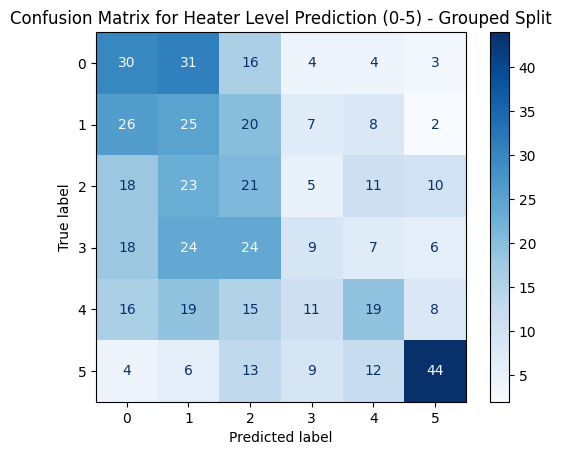

In [ ]:
y_pred_grouped = rf_model_grouped.predict(X_test_grouped_imp)

print("\nClassification Report (Grouped Split):")
print(classification_report(y_test_grouped, y_pred_grouped))

cm_grouped = confusion_matrix(y_test_grouped, y_pred_grouped, labels=np.unique(y))
disp_grouped = ConfusionMatrixDisplay(
    confusion_matrix=cm_grouped,
    display_labels=np.unique(y)
)
disp_grouped.plot(cmap="Blues")
plt.title("Confusion Matrix for Heater Level Prediction (0-5) - Grouped Split")
plt.show()


Top 20 Feature Importances (Grouped Split):
BVP_iqr              0.029211
BVP_std              0.026507
BVP_range            0.023708
BVP_kurtosis         0.023086
BVP_skew             0.017228
BVP_rr_mean          0.014315
EDA_iqr              0.014314
SkinTemp_kurtosis    0.014157
BVP_rmssd            0.013722
BVP_hr_mean          0.013621
SkinTemp_skew        0.013572
BVP_rr_std           0.013479
ECG_mean             0.013157
EDA_kurtosis         0.013123
BVP_hr_std           0.012903
EDA_skew             0.012582
Resp_mean            0.012312
SkinTemp_mean        0.012001
EDA_std              0.011886
Resp_skew            0.011851
dtype: float64


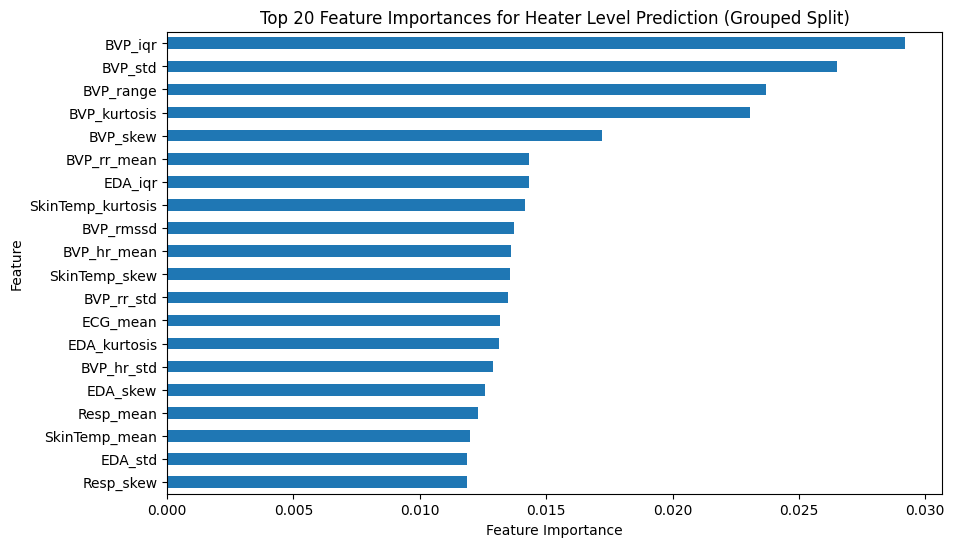

In [ ]:
importances_grouped = pd.Series(
    rf_model_grouped.feature_importances_,
    index=X_feat.columns
).sort_values(ascending=False)

print("\nTop 20 Feature Importances (Grouped Split):")
print(importances_grouped.head(20))

plt.figure(figsize=(10, 6))
importances_grouped.head(20).plot(kind="barh")
plt.title("Top 20 Feature Importances for Heater Level Prediction (Grouped Split)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

# Jan 27


More features:
mean, standard deviation, minimum, maximum, range, minimum ratio, and maximum ratio from the signal and the first-order differences of the signal. In their paper, they
used 16 statistical features from the time-domain of BVP, plus eight features from ECG and
ten features from EDA to predict pain levels using Linear Discriminant Analysis and principal
component analysis
time-domain, frequency-domain, and nonlinear measures




*   Number Symbol Feature Description
1 RMSSD Root mean square of successive time differences between heartbeats
2 SDSD Standard deviation of the 1st order discrete differences
3 pNN50 Percentage of successive IBIs that differ by more than 50 milliseconds
4 pNN25 Percentage of successive IBIs that differ by more than 25 milliseconds
5 pNN10 Percentage of successive IBIs that differ by more than 10 milliseconds
6 RRmean Mean of RR intervals
7 RRSTD Standard deviation of RR intervals
8 RRMed Median of RR intervals
9 RRMin Minimum of RR intervals
10 RRMax Maximum of RR intervals
11 I-VLF Power in very low frequency [0.003, 0.04 Hz]
12 I-ILF Power in low-frequency band [0.04, 0.15 Hz]
13 I-HF Power in high-frequency band [0.15, 0.4 Hz]
14 I-Pow Total power of IBIs
15 I-SD1 Poincaré plot standard deviation perpendicular the line of identity
16 I-SD2 Poincaré plot standard deviation along the line of identity
17 I-SD12 Ratio of SD1-to-SD2
18 I-Sdell SD1*SD2*pi value of the Poincare' plot of input IBIs
19 I-DFA1 Detrended fluctuation analysis, which describes short-term fluctuations
of IBIs
20 I-ApEn Approximate entropy which measures the regularity and complexity of
IBIs
Table 1. Feature engineering from Inter-beat Intervals (IBIs) based on BVP signal.
Number Symbol Feature Description
1 Mean Mean of BVP signal
2 STD The standard deviation of BVP signal
3 DNH5 Mode of 5-bin z-scored histogram
4 DNH10 Mode of 10-bin z-scored histogram
5 COf1eac First 1/e crossing of the autocorrelation function
6 AMI Auto-mutual information, m = 2, τ = 5
7 DNn Time intervals between successive extreme events below the mean
8 COf1eac First 1/e crossing of the autocorrelation function
9 COFmin First minimum of the autocorrelation function
7
10 SPow5th Total power in the lowest fifth of frequencies in the Fourier power spectrum
11 SPowCent Centroid of the Fourier power spectrum
12 FCmean Mean error from a rolling 3-sample mean forecasting
13 COtrev Time-reversibility statistic, ((xt+1 – xt)3)t
14 AMI Auto-mutual information, m = 2, τ = 5
15 INAut First minimum of the auto-mutual information function
16 MDpnn40 Proportion of successive differences exceeding 0.04σ
17 SBlongst Longest period of successive incremental decreases
18 SBshanEn Shannon entropy of two successive 3-letter symbolization
19 SBTrace Trace of covariance of transition matrix between symbols in 3-letter alphabet
20 SBPerioc Periodicity measure of Wang
21 FCmean Change in correlation length after iterative differencing
22 COexpfit Exponential fit to successive distances in 2-d embedding space
23 SCFlucdfa Proportion of slower timescale fluctuations that scale with DFA
24 SCFlucrsr Proportion of slower timescale fluctuations that scale with linearly rescaled range fits
Table 2. Feature engineering directly from Blood Volm Pulse (BVP) signal
*   List item



Core tonic features (SCL)
These generally increase with stronger physical pain and often correlate with pain ratings.

Mean skin conductance level (SCL) over an interval (baseline, stimulus, recovery).

Normalized SCL (nSCL), e.g., SCL relative to baseline or z‑scored per subject; nSCL discriminates pain vs other sympathetic stimuli better than simple frequency measures and tracks heat/mechanical pain intensity.
​

SCL slope during pain (rise slope from stimulus onset to peak pain; decay slope during recovery), which reflects build‑up and relief of pain.
​

SCL variability (standard deviation, range within a window), sometimes linked to dynamic pain experiences.
​

Core phasic features (SCR)
Phasic responses are particularly tied to stimulus-locked nociceptive events and subjective pain reports.

Number of SCRs per unit time or per stimulus (frequency of skin conductance responses).
​

SCR amplitude (peak height above local tonic level) to pain stimuli; larger amplitudes often reflect higher pain or arousal.

SCR latency (time from pain onset to SCR peak), used when stimuli are well time‑locked (e.g., heat pulses, electrical shocks).

SCR rise time and recovery time, describing how fast the response reaches peak and returns to baseline.
​

Sum or integral of phasic activity over a window (area under SCRs), capturing overall sympathetic response magnitude.

Composite and temporal-region features
Dynamic pain paradigms benefit from features computed over specific temporal segments of the pain episode.
​

Segment‑wise SCL (e.g., pre‑stimulus baseline, rising‑pain region, peak‑pain region, recovery region) to capture different phases of pain experience.
​

Change scores (ΔSCL, ΔnSCL, ΔSCR amplitude) between baseline and peak‑pain or between conditions (no pain vs high pain).

Habituation indices across repeated pain trials (decrease in SCR frequency or amplitude over repetitions).
​

Features that have shown particularly good pain discrimination
Some specific EDA features have repeatedly emerged as strong markers in pain work.

Normalized SCL (nSCL): differentiates physical pain from other sympathetic stimuli and correlates with individual pain scores better than SCR frequency measures.
​

Mean/median SCL during sustained pain and early recovery, especially in cold or capsaicin paradigms.
​

SCR amplitude and frequency time‑locked to nociceptive stimuli, often used as primary machine‑learning features in EDA‑based pain detection systems

In [16]:
CHANNEL_MAP = {
    0: "EDA",
    1: "BVP",
    2: "IBI"   # already extracted inter-beat intervals
}
FS = 100  # Hz for EDA/BVP


In [17]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks, welch
from scipy.stats import skew, kurtosis, entropy
from sklearn.model_selection import GroupShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import shap
import matplotlib.pyplot as plt


In [29]:
def hrv_features(ibi):
    ibi = np.ravel(ibi).astype(float)
    ibi = ibi[ibi > 0]

    if len(ibi) < 5:
        return {k: 0 for k in [
            "RMSSD","SDSD","pNN50","pNN25","pNN10",
            "RRmean","RRSTD","RRMed","RRMin","RRMax",
            "VLF","LF","HF","TP",
            "SD1","SD2","SD12","SDel",
            "DFA1","ApEn"
        ]}

    diff_rr = np.diff(ibi)

    rmssd = np.sqrt(np.mean(diff_rr**2))
    sdsd = np.std(diff_rr)
    pnn50 = np.mean(np.abs(diff_rr) > 0.05)
    pnn25 = np.mean(np.abs(diff_rr) > 0.025)
    pnn10 = np.mean(np.abs(diff_rr) > 0.01)

    freqs, psd = welch(ibi - np.mean(ibi), fs=4.0)

    vlf = np.trapezoid(psd[(freqs>=0.003)&(freqs<0.04)],
                      freqs[(freqs>=0.003)&(freqs<0.04)])

    lf  = np.trapezoid(psd[(freqs>=0.04)&(freqs<0.15)],
                      freqs[(freqs>=0.04)&(freqs<0.15)])

    hf  = np.trapezoid(psd[(freqs>=0.15)&(freqs<0.4)],
                      freqs[(freqs>=0.15)&(freqs<0.4)])

    tp  = np.trapezoid(psd, freqs)


    sd1 = np.sqrt(np.var(diff_rr)/2)
    sd2 = np.sqrt(2*np.var(ibi) - sd1**2)
    sd12 = sd1/sd2 if sd2!=0 else 0
    sdel = np.pi*sd1*sd2

    def apen(x, m=2, r=None):
        if r is None:
            r = 0.2*np.std(x)
        def _phi(m):
            return np.mean([
                np.mean(np.abs(x[i:i+m]-x[j:j+m]).max() <= r)
                for i in range(len(x)-m)
                for j in range(len(x)-m)
            ])
        return np.log(_phi(m)/_phi(m+1)) if _phi(m+1)!=0 else 0

    return {
        "RMSSD": rmssd,
        "SDSD": sdsd,
        "pNN50": pnn50,
        "pNN25": pnn25,
        "pNN10": pnn10,
        "RRmean": np.mean(ibi),
        "RRSTD": np.std(ibi),
        "RRMed": np.median(ibi),
        "RRMin": np.min(ibi),
        "RRMax": np.max(ibi),
        "VLF": vlf, "LF": lf, "HF": hf, "TP": tp,
        "SD1": sd1, "SD2": sd2, "SD12": sd12, "SDel": sdel,
        "DFA1": np.std(np.cumsum(ibi - np.mean(ibi))),
        "ApEn": apen(ibi)
    }


In [25]:
def bvp_features(sig):
    sig = np.ravel(sig).astype(float)
    zsig = (sig - np.mean(sig)) / (np.std(sig) + 1e-6)

    freqs, psd = welch(sig, FS)
    total_power = np.sum(psd)

    ac = np.correlate(sig, sig, mode='full')[len(sig)-1:]
    ac /= ac[0] if ac[0] != 0 else 1
    first_1e = np.where(ac < 1/np.e)[0][0] if np.any(ac < 1/np.e) else 0

    return {
        "Mean": np.mean(sig),
        "STD": np.std(sig),
        "Skew": skew(sig),
        "Kurtosis": kurtosis(sig),
        "DNH5": np.histogram(zsig, bins=5)[0].argmax(),
        "DNH10": np.histogram(zsig, bins=10)[0].argmax(),
        "COf1eac": first_1e,
        "COFmin": np.argmin(ac),
        "SPow5th": np.sum(psd[:len(psd)//5]),
        "SPowCent": np.sum(freqs*psd)/total_power if total_power>0 else 0,
        "FCmean": np.mean(np.abs(sig - pd.Series(sig).rolling(3,min_periods=1).mean())),
        "COtrev": np.mean((sig[1:]-sig[:-1])**3),
        "MDpnn40": np.mean(np.abs(np.diff(sig)) > 0.04*np.std(sig)),
        "SBshanEn": entropy(np.histogram(sig, bins=10)[0])
    }


In [26]:
def eda_features(sig):
    sig = np.ravel(sig).astype(float)
    n = len(sig)
    segs = np.array_split(sig, 4)

    scl_mean = np.mean(sig)
    scl_std = np.std(sig)
    scl_range = np.ptp(sig)
    scl_slope = np.polyfit(np.arange(n), sig, 1)[0]

    nscl = (sig - np.mean(segs[0])) / (np.std(segs[0]) + 1e-6)

    peaks, props = find_peaks(sig, height=scl_mean + 0.5*scl_std, distance=FS)
    amps = props["peak_heights"] if len(peaks)>0 else np.array([0])
    lat = peaks/FS if len(peaks)>0 else np.array([0])

    return {
        "SCL_mean": scl_mean,
        "SCL_std": scl_std,
        "SCL_range": scl_range,
        "SCL_slope": scl_slope,
        "nSCL_mean": np.mean(nscl),
        "nSCL_peak": np.max(nscl),
        "SCR_count": len(peaks),
        "SCR_mean_amp": np.mean(amps),
        "SCR_max_amp": np.max(amps),
        "SCR_latency_mean": np.mean(lat),
        "SCR_area": np.sum(amps),
        "SCL_seg1": np.mean(segs[0]),
        "SCL_seg2": np.mean(segs[1]),
        "SCL_seg3": np.mean(segs[2]),
        "SCL_seg4": np.mean(segs[3]),
        "dSCL_peak_base": np.mean(segs[2]) - np.mean(segs[0])
    }


In [27]:
def extract_features(X):
    rows = []

    for i in range(X.shape[0]):
        feats = {}

        eda = np.ravel(X[i,:,0])
        bvp = np.ravel(X[i,:,1])
        ibi = np.ravel(X[i,:,2])

        for k,v in eda_features(eda).items():
            feats[f"EDA_{k}"] = v

        for k,v in bvp_features(bvp).items():
            feats[f"BVP_{k}"] = v

        for k,v in hrv_features(ibi).items():
            feats[f"HRV_{k}"] = v

        rows.append(feats)

    return pd.DataFrame(rows)


In [ ]:
X_feat = extract_features(X)

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in gss.split(X_feat, y, groups=subjects):
    X_train, X_test = X_feat.iloc[train_idx], X_feat.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=15,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


In [ ]:
feat_imp = pd.Series(rf.feature_importances_, index=X_feat.columns)
feat_imp.sort_values(ascending=False).head(20)


In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_feat.iloc[train_idx])
shap.summary_plot(shap_values, X_feat.iloc[train_idx], plot_type="bar")


# EDA and BVP + Explainability

In [30]:
import numpy as np
from scipy.signal import find_peaks, welch

# ---------------- EDA FEATURES ---------------- #
def eda_features_fast(eda, fs):
    eda = eda.astype(float)
    duration = len(eda) / fs

    # ----- Tonic (SCL) -----
    scl_mean = np.mean(eda)
    scl_std = np.std(eda)
    scl_range = np.ptp(eda)

    baseline = np.mean(eda[:fs*2]) if len(eda) > fs*2 else scl_mean
    baseline_std = np.std(eda[:fs*2]) + 1e-6
    nSCL = (scl_mean - baseline) / baseline_std

    slope = (eda[-1] - eda[0]) / duration

    # ----- Phasic (SCR) -----
    peaks, props = find_peaks(eda, height=np.std(eda), distance=fs*0.5)
    amps = props["peak_heights"] if len(peaks) else np.array([0])

    scr_freq = len(peaks) / duration
    scr_mean_amp = np.mean(amps)
    scr_max_amp = np.max(amps)

    auc_phasic = np.trapz(np.abs(eda - scl_mean))

    return {
        "SCL_mean": scl_mean,
        "SCL_std": scl_std,
        "SCL_range": scl_range,
        "nSCL": nSCL,
        "SCL_slope": slope,
        "SCR_freq": scr_freq,
        "SCR_mean_amp": scr_mean_amp,
        "SCR_max_amp": scr_max_amp,
        "SCR_AUC": auc_phasic
    }


# ---------------- BVP FEATURES ---------------- #
def bvp_features_fast(bvp, fs):
    bvp = bvp.astype(float)
    duration = len(bvp) / fs

    mean = np.mean(bvp)
    std = np.std(bvp)

    # Heartbeat peaks
    peaks, _ = find_peaks(bvp, distance=fs*0.4)
    peak_rate = len(peaks) / duration

    # Spectral features
    freqs, psd = welch(bvp, fs=fs)
    total_power = np.trapz(psd)
    centroid_freq = np.sum(freqs * psd) / (total_power + 1e-6)

    low_band = np.trapz(psd[freqs < 1])
    mid_band = np.trapz(psd[(freqs >= 1) & (freqs < 2.5)])
    high_band = np.trapz(psd[freqs >= 2.5])

    return {
        "BVP_mean": mean,
        "BVP_std": std,
        "BVP_peak_rate": peak_rate,
        "BVP_power_total": total_power,
        "BVP_centroid_freq": centroid_freq,
        "BVP_power_low": low_band,
        "BVP_power_mid": mid_band,
        "BVP_power_high": high_band
    }


In [31]:
from joblib import Parallel, delayed
import pandas as pd

def extract_features_sample(i, X, fs):
    sample = X[i]

    eda = sample[:, 1, 0]
    bvp = sample[:, 3, 0]

    feats = {}
    feats.update({f"EDA_{k}": v for k, v in eda_features_fast(eda, fs).items()})
    feats.update({f"BVP_{k}": v for k, v in bvp_features_fast(bvp, fs).items()})

    return feats


def extract_features_parallel(X, fs=100, n_jobs=-1):
    feat_list = Parallel(n_jobs=n_jobs, verbose=5)(
        delayed(extract_features_sample)(i, X, fs)
        for i in range(len(X))
    )
    return pd.DataFrame(feat_list)


In [32]:
X_feat = extract_features_parallel(X, fs=100, n_jobs=-1)
print("Feature matrix shape:", X_feat.shape)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 1040 tasks      | elapsed:   11.6s


Feature matrix shape: (2495, 17)


[Parallel(n_jobs=-1)]: Done 2492 out of 2495 | elapsed:   21.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 2495 out of 2495 | elapsed:   21.2s finished



LOSO Fold 1 | Test Subject: 0

LOSO Fold 2 | Test Subject: 1

LOSO Fold 3 | Test Subject: 2

LOSO Fold 4 | Test Subject: 3

LOSO Fold 5 | Test Subject: 4

LOSO Fold 6 | Test Subject: 5

LOSO Fold 7 | Test Subject: 6

LOSO Fold 8 | Test Subject: 7

LOSO Fold 9 | Test Subject: 8

LOSO Fold 10 | Test Subject: 9

LOSO Fold 11 | Test Subject: 10

LOSO Fold 12 | Test Subject: 11

LOSO Fold 13 | Test Subject: 12

LOSO Fold 14 | Test Subject: 13

LOSO Fold 15 | Test Subject: 14

LOSO Fold 16 | Test Subject: 15

LOSO Fold 17 | Test Subject: 16

LOSO Fold 18 | Test Subject: 17

LOSO Fold 19 | Test Subject: 18

LOSO Fold 20 | Test Subject: 19

LOSO Fold 21 | Test Subject: 20

LOSO Fold 22 | Test Subject: 21

LOSO Fold 23 | Test Subject: 22

LOSO Fold 24 | Test Subject: 23

LOSO Fold 25 | Test Subject: 24

LOSO Fold 26 | Test Subject: 25

LOSO Fold 27 | Test Subject: 26

LOSO Fold 28 | Test Subject: 27

LOSO Fold 29 | Test Subject: 28

LOSO Fold 30 | Test Subject: 29

LOSO Fold 31 | Test Subject:

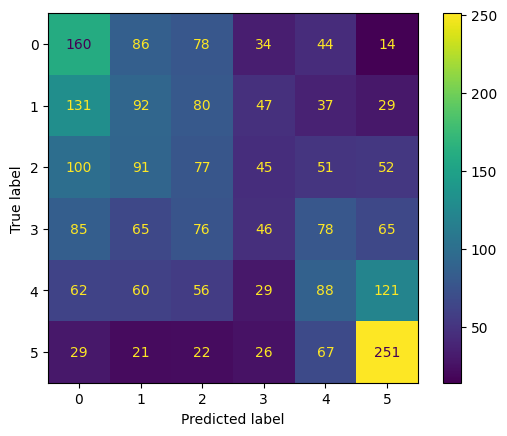

In [34]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define y here, as it's used in logo.split
y = np.argmax(y_heater, axis=1)

logo = LeaveOneGroupOut()

all_preds, all_true = [], []
feature_importances = []

for fold, (train_idx, test_idx) in enumerate(logo.split(X_feat, y, groups=subjects)):
    print(f"\nLOSO Fold {fold+1} | Test Subject: {subjects[test_idx][0]}")

    X_train, X_test = X_feat.iloc[train_idx], X_feat.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    imputer = SimpleImputer(strategy="median")
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    rf = RandomForestClassifier(
        n_estimators=300,
        max_depth=12,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    )

    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)

    all_preds.extend(preds)
    all_true.extend(y_test)
    feature_importances.append(rf.feature_importances_)

print("\nFinal results: ")
print(classification_report(all_true, all_preds))

ConfusionMatrixDisplay.from_predictions(all_true, all_preds)
plt.show()


In [35]:
mean_importance = np.mean(feature_importances, axis=0)
importance_df = pd.DataFrame({
    "feature": X_feat.columns,
    "importance": mean_importance
}).sort_values("importance", ascending=False)

print("\nTop 20 Most Important Features:")
print(importance_df.head(20))



Top 20 Most Important Features:
                  feature  importance
10            BVP_BVP_std    0.100885
4           EDA_SCL_slope    0.084004
9            BVP_BVP_mean    0.072491
3                EDA_nSCL    0.070839
14      BVP_BVP_power_low    0.064221
13  BVP_BVP_centroid_freq    0.062071
12    BVP_BVP_power_total    0.061849
15      BVP_BVP_power_mid    0.058070
16     BVP_BVP_power_high    0.055882
8             EDA_SCR_AUC    0.052052
1             EDA_SCL_std    0.050795
2           EDA_SCL_range    0.048377
6        EDA_SCR_mean_amp    0.047177
0            EDA_SCL_mean    0.046957
7         EDA_SCR_max_amp    0.046203
5            EDA_SCR_freq    0.040971
11      BVP_BVP_peak_rate    0.037155


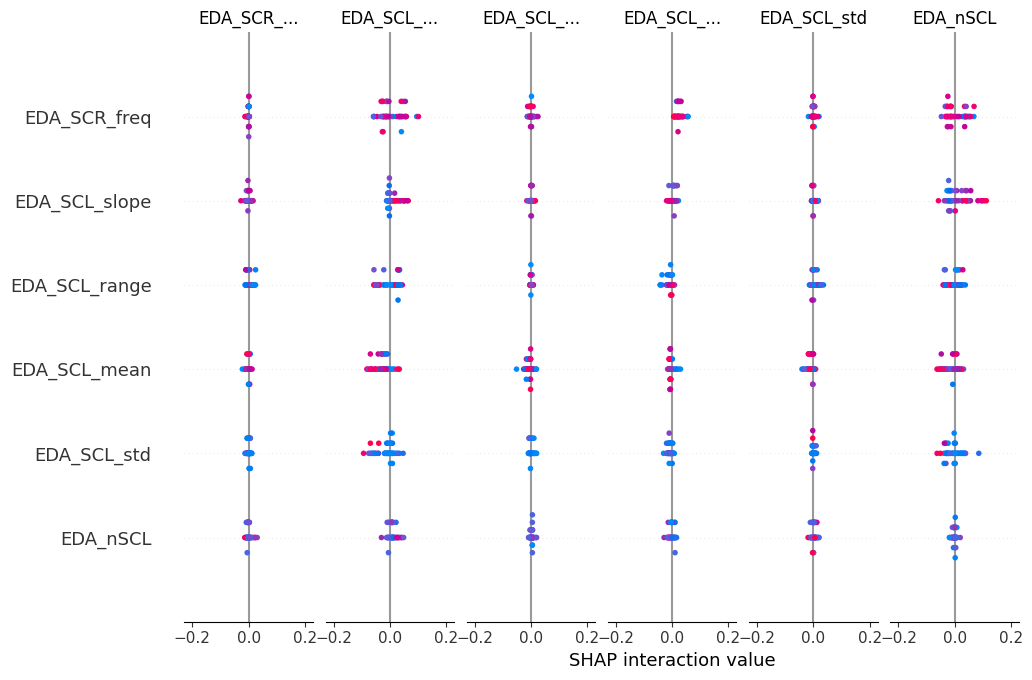

In [36]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X_feat.columns)



Partial Dependence Plots for Pain Level: 0


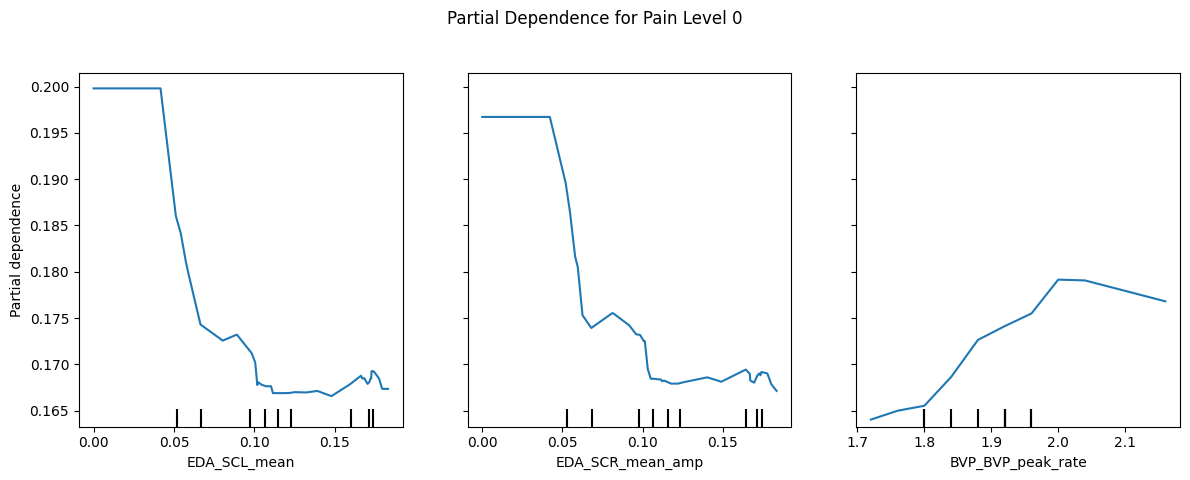


Partial Dependence Plots for Pain Level: 1


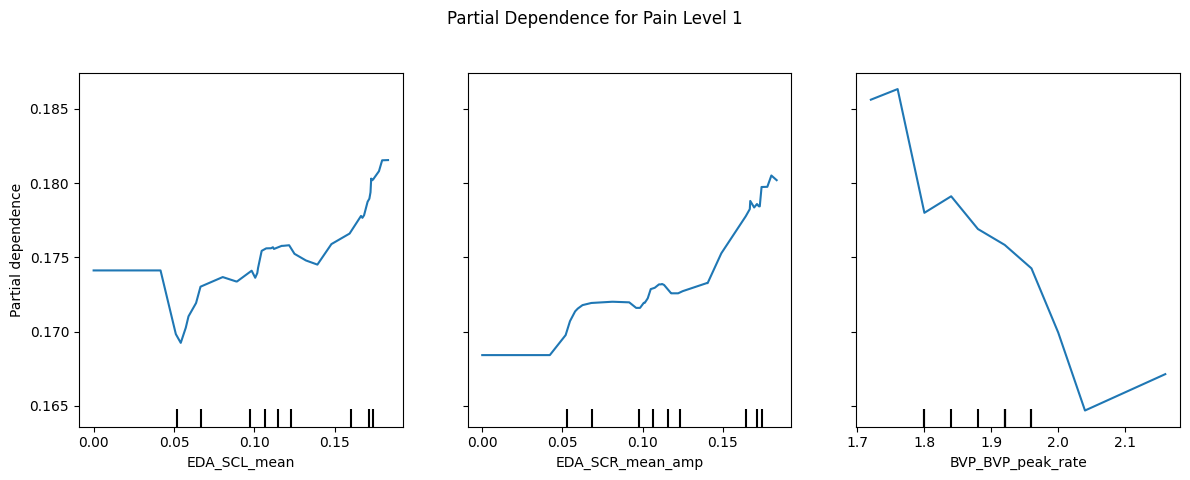


Partial Dependence Plots for Pain Level: 2


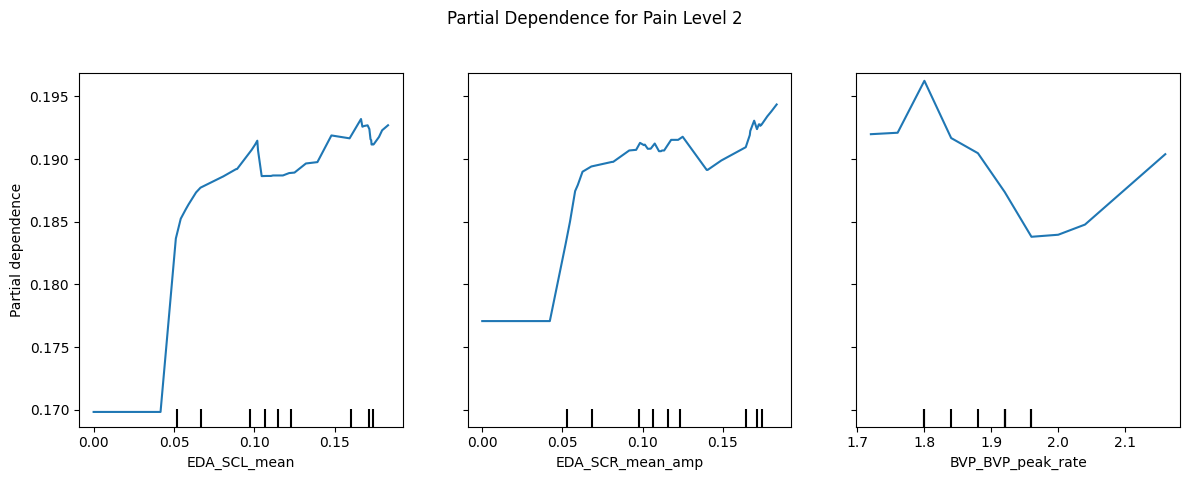


Partial Dependence Plots for Pain Level: 3


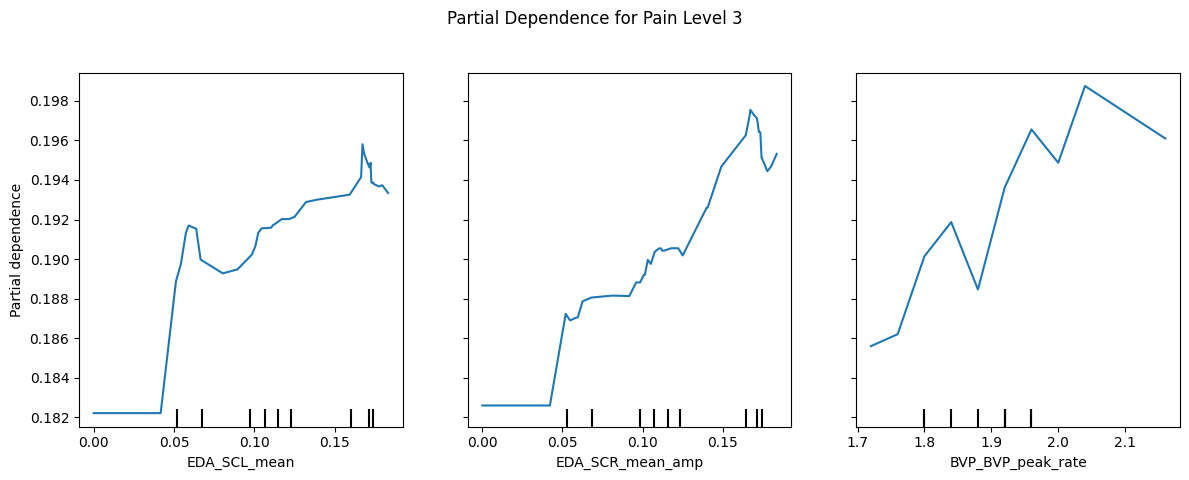


Partial Dependence Plots for Pain Level: 4


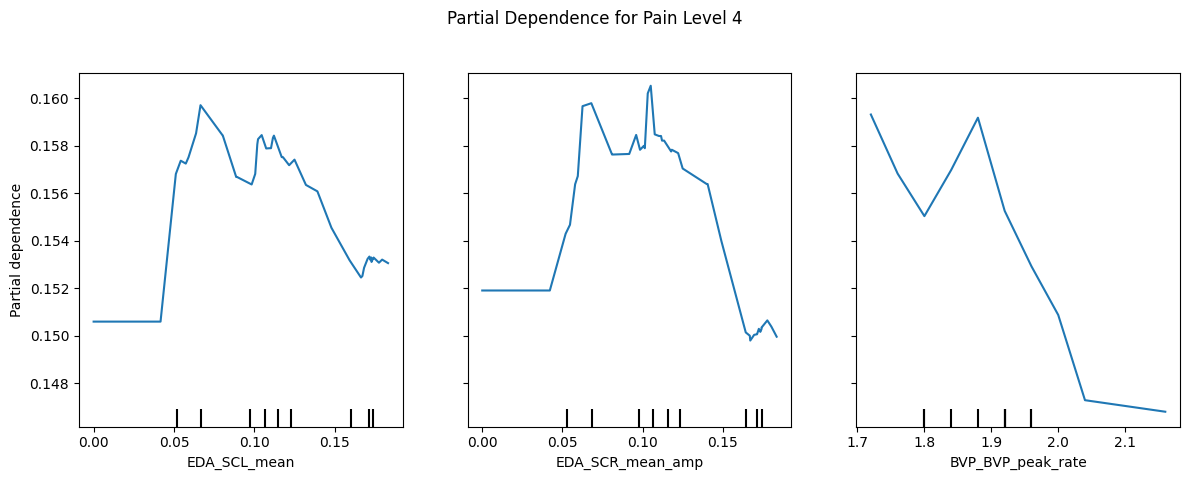


Partial Dependence Plots for Pain Level: 5


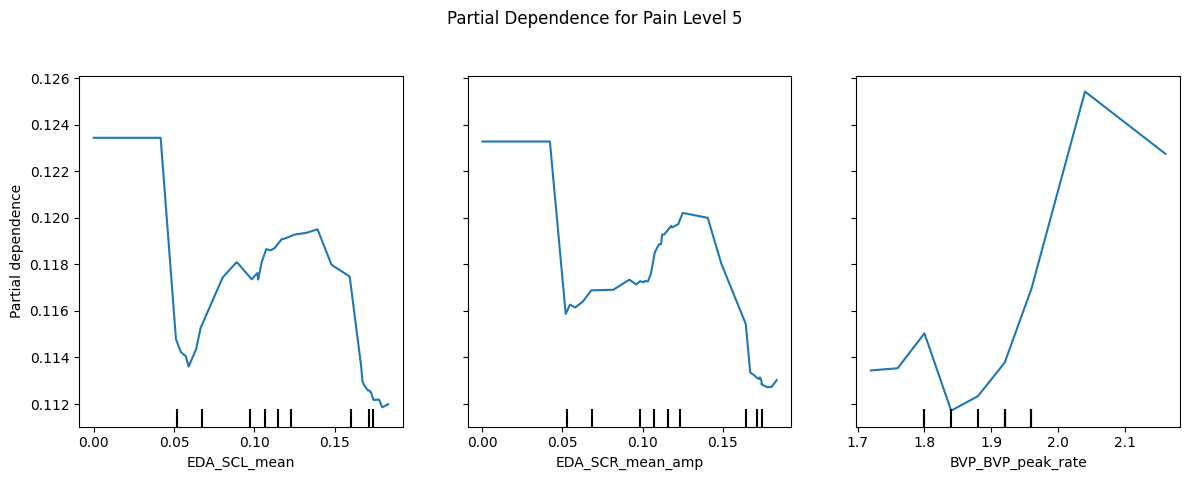

In [41]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Get the unique class labels from your target variable y
class_labels = np.unique(y) # Assuming 'y' is defined from y_heater and contains 0-5

for class_idx in class_labels:
    print(f"\nPartial Dependence Plots for Pain Level: {class_idx}")
    fig, ax = plt.subplots(figsize=(12, 5))
    PartialDependenceDisplay.from_estimator(
        rf,
        X_test,
        features=["EDA_SCL_mean", "EDA_SCR_mean_amp", "BVP_BVP_peak_rate"],
        feature_names=X_feat.columns,
        grid_resolution=50,
        target=class_idx, # Specify the target class
        ax=ax
    )
    fig.suptitle(f"Partial Dependence for Pain Level {class_idx}")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
    plt.show()

In [44]:
!pip install treeinterpreter
from treeinterpreter import treeinterpreter as ti
import numpy as np # Ensure numpy is imported for array2string

prediction, bias, contributions = ti.predict(rf, X_test)
print("First sample contributions:")
for feat, val in zip(X_feat.columns, contributions[0]):
    # Convert the numpy array 'val' to a formatted string before printing
    print(f"{feat}: {np.array2string(val, precision=3, separator=', ')}")

First sample contributions:
EDA_SCL_mean: [-0.006, -0.005, -0.012, -0.006,  0.01 ,  0.019]
EDA_SCL_std: [-0.004, -0.006, -0.   ,  0.001, -0.009,  0.018]
EDA_SCL_range: [-0.004,  0.003, -0.006,  0.   ,  0.005,  0.002]
EDA_nSCL: [-0.015, -0.014, -0.002, -0.005,  0.012,  0.025]
EDA_SCL_slope: [-0.008, -0.008, -0.003, -0.   ,  0.014,  0.005]
EDA_SCR_freq: [-0.001, -0.007, -0.003,  0.019, -0.006, -0.002]
EDA_SCR_mean_amp: [-0.009, -0.009, -0.013, -0.004,  0.005,  0.03 ]
EDA_SCR_max_amp: [-0.002,  0.004, -0.004, -0.012,  0.012,  0.001]
EDA_SCR_AUC: [ 0.001,  0.002, -0.005,  0.002, -0.004,  0.004]
BVP_BVP_mean: [ 0.001,  0.007,  0.002,  0.015,  0.021, -0.046]
BVP_BVP_std: [-0.078, -0.061, -0.068, -0.04 ,  0.029,  0.217]
BVP_BVP_peak_rate: [-0.003, -0.001,  0.001, -0.003,  0.001,  0.005]
BVP_BVP_power_total: [-0.013, -0.015, -0.005, -0.005, -0.003,  0.041]
BVP_BVP_centroid_freq: [-0.005, -0.013, -0.006, -0.007,  0.009,  0.022]
BVP_BVP_power_low: [-0.015, -0.016, -0.015, -0.007,  0.002,  0.051]

In [46]:
!pip install lime
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train, feature_names=X_feat.columns, class_names=np.unique(y).astype(str), mode='classification')
i = 0  # first test sample
exp = explainer.explain_instance(X_test[i], rf.predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c96426fdb5846f0f2959a133a8eb33b2799514c8c28f21dbeccbb3d3700332e3
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [47]:
from sklearn.tree import DecisionTreeClassifier, export_text


surrogate = DecisionTreeClassifier(max_depth=3)
surrogate.fit(X_train, rf.predict(X_train))
print(export_text(surrogate, feature_names=list(X_feat.columns)))


|--- BVP_BVP_std <= 0.20
|   |--- EDA_nSCL <= 2.13
|   |   |--- EDA_SCL_slope <= -0.00
|   |   |   |--- class: 0
|   |   |--- EDA_SCL_slope >  -0.00
|   |   |   |--- class: 1
|   |--- EDA_nSCL >  2.13
|   |   |--- BVP_BVP_power_low <= 0.00
|   |   |   |--- class: 2
|   |   |--- BVP_BVP_power_low >  0.00
|   |   |   |--- class: 4
|--- BVP_BVP_std >  0.20
|   |--- EDA_SCL_slope <= -0.00
|   |   |--- BVP_BVP_std <= 0.41
|   |   |   |--- class: 2
|   |   |--- BVP_BVP_std >  0.41
|   |   |   |--- class: 4
|   |--- EDA_SCL_slope >  -0.00
|   |   |--- BVP_BVP_std <= 0.49
|   |   |   |--- class: 5
|   |   |--- BVP_BVP_std >  0.49
|   |   |   |--- class: 5




ICE Plots for Pain Level: 0


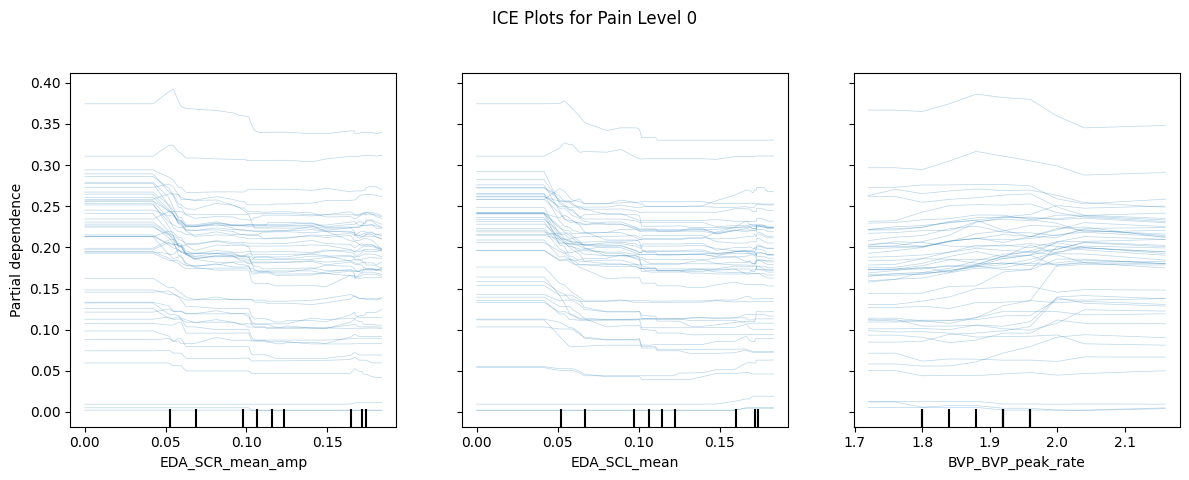


ICE Plots for Pain Level: 1


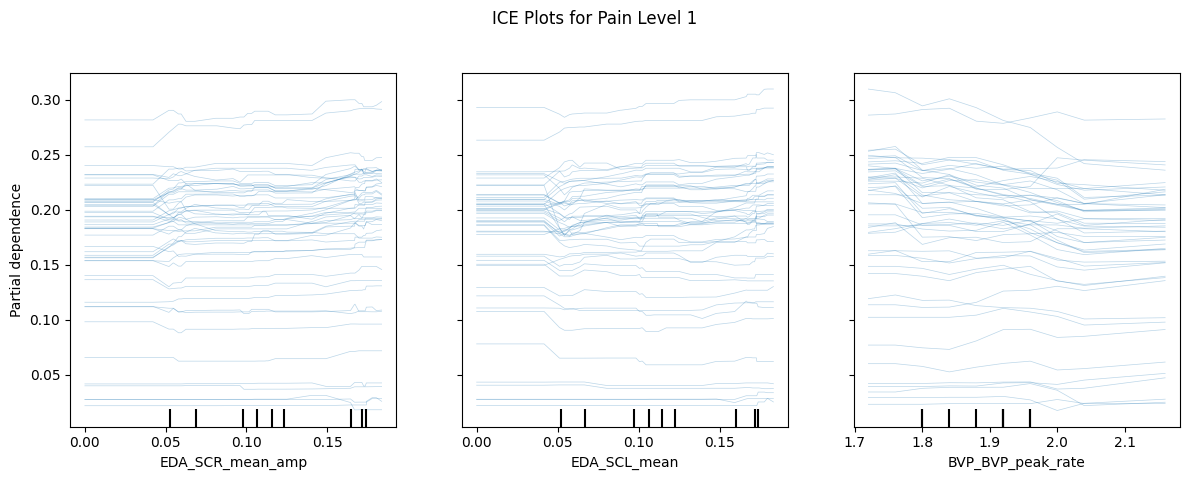


ICE Plots for Pain Level: 2


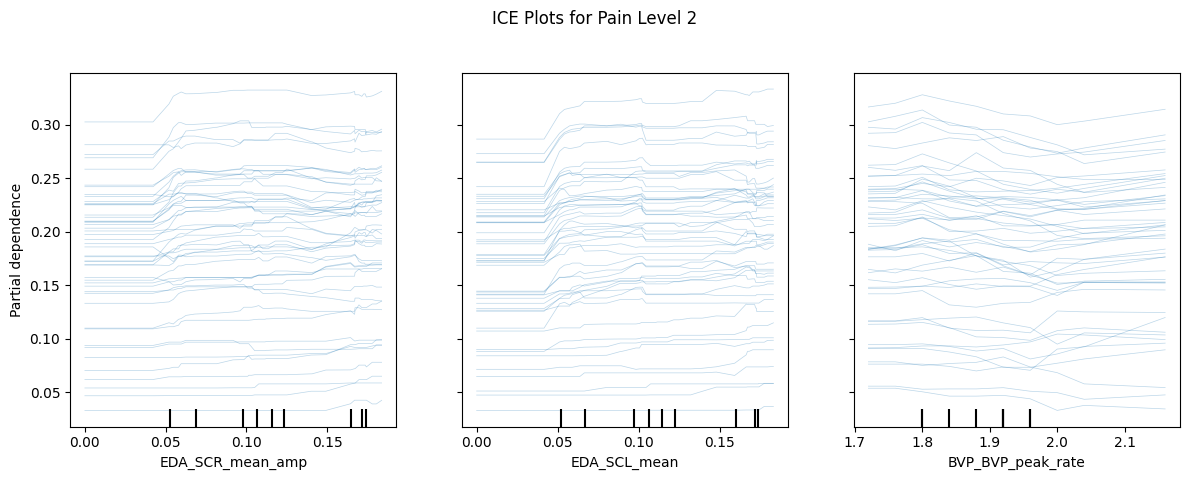


ICE Plots for Pain Level: 3


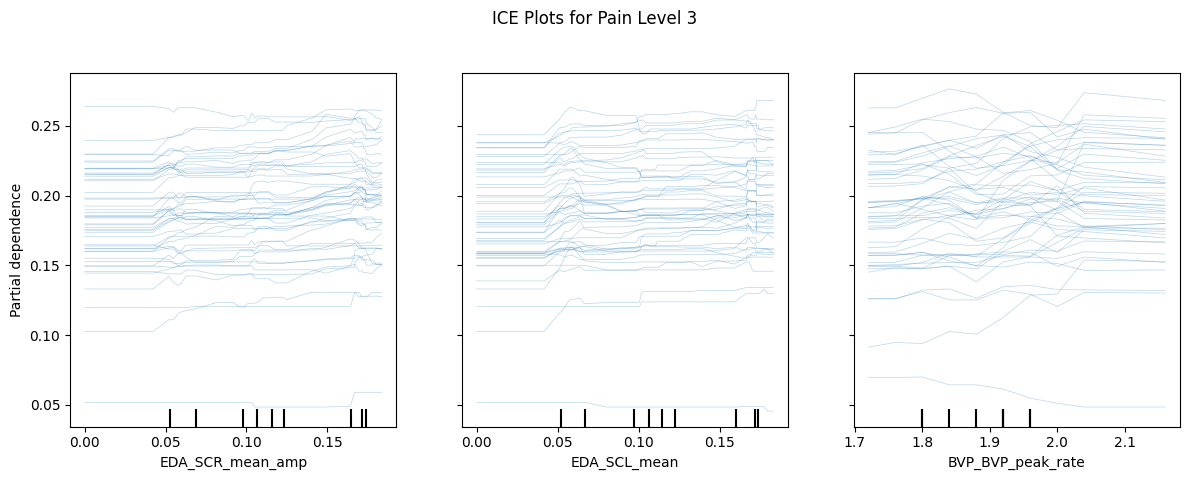


ICE Plots for Pain Level: 4


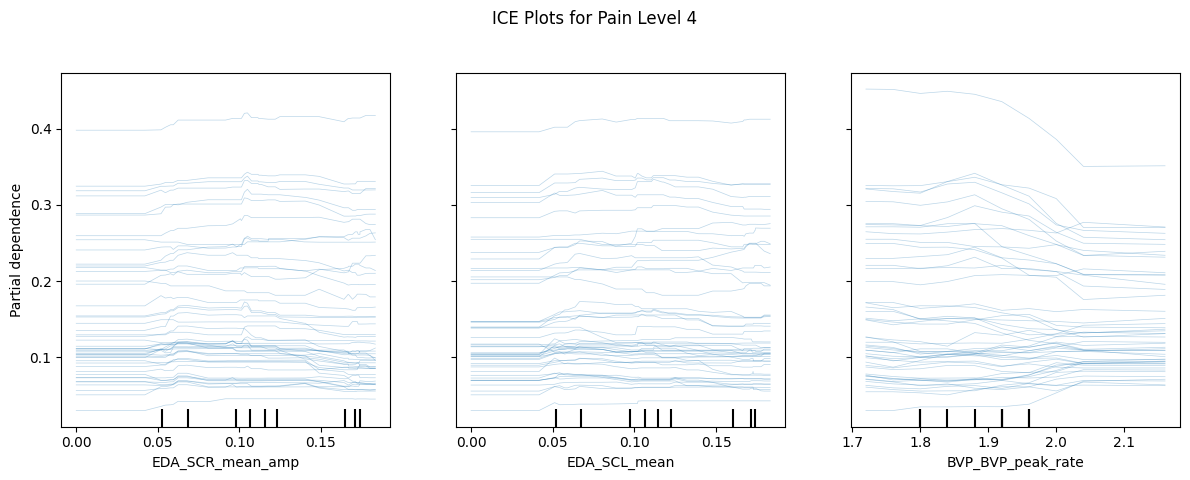


ICE Plots for Pain Level: 5


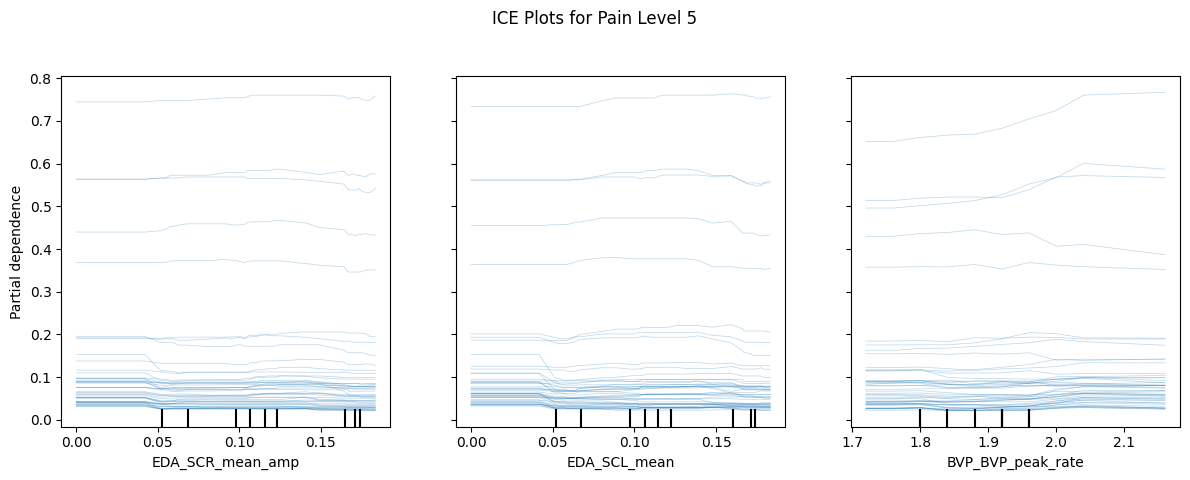

In [49]:
# ----------------- ICE PLOTS ----------------- #
# Make sure sklearn >= 1.2

from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Corrected feature names for consistency and accuracy
top_features = ["EDA_SCR_mean_amp", "EDA_SCL_mean", "BVP_BVP_peak_rate"]

# Get the unique class labels from your target variable y
class_labels = np.unique(y) # y is already defined from y_heater (0-5)

for class_idx in class_labels:
    print(f"\nICE Plots for Pain Level: {class_idx}")
    fig, ax = plt.subplots(figsize=(12, 5))
    PartialDependenceDisplay.from_estimator(
        rf,              # trained RandomForestClassifier
        X_test,          # test set (after imputation)
        features=top_features,
        kind="individual",  # 'individual' generates ICE
        feature_names=X_feat.columns,
        grid_resolution=50,
        target=class_idx, # Specify the target class for multi-class models
        ax=ax
    )
    fig.suptitle(f"ICE Plots for Pain Level {class_idx}")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
    plt.show()